In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50.0,male,30.97,3.0,no,northwest,10600.5483
1334,18.0,female,31.92,0.0,no,northeast,2205.9808
1335,18.0,female,36.85,0.0,no,southeast,1629.8335
1336,21.0,female,25.80,0.0,no,southwest,2007.9450
1337,61.0,female,29.07,0.0,yes,northwest,29141.3603


In [5]:
data.shape

(1338, 7)

In [6]:
data.dtypes

,0
age,float64
sex,object
bmi,float64
children,float64
smoker,object
region,object
charges,float64


In [7]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [8]:
data.describe()

,age,bmi,children,charges
count,1335.000000,1334.000000,1335.000000,1338.000000
mean,39.214232,30.665390,1.094382,13270.422265
std,14.051488,6.098268,1.206587,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.isnull().sum()

,0
age,3
sex,0
bmi,4
children,3
smoker,0
region,0
charges,0


In [10]:
data['age'].fillna(data['age'].mean(numeric_only=True).round(), inplace=True)
data['bmi'].fillna(data['bmi'].mean(numeric_only=True).round(), inplace=True)
data['children'].fillna(data['children'].mean(numeric_only=True).round(), inplace=True)

<ipython-input-10-d9fa4667ff64>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(numeric_only=True).round(), inplace=True)
<ipython-input-10-d9fa4667ff64>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [11]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [12]:
data.mean(numeric_only=True).round()

,0
age,39.0
bmi,31.0
children,1.0
charges,13270.0


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
#label_encoder = {}
data['sex'] = data['sex'].map({'male': 1, 'female': 0})

In [15]:
data

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,yes,southwest,16884.92400
1,18.0,1,33.770,1.0,no,southeast,1725.55230
2,28.0,1,33.000,3.0,no,southeast,4449.46200
3,33.0,1,22.705,0.0,no,northwest,21984.47061
4,32.0,1,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3.0,no,northwest,10600.54830
1334,18.0,0,31.920,0.0,no,northeast,2205.98080
1335,18.0,0,36.850,0.0,no,southeast,1629.83350
1336,21.0,0,25.800,0.0,no,southwest,2007.94500


In [16]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['region'] = data['region'].map({'southwest': 3, 'southeast': 2,'northwest':1,'northeast':0})
data

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
1,18.0,1,33.770,1.0,0,2,1725.55230
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3.0,0,1,10600.54830
1334,18.0,0,31.920,0.0,0,0,2205.98080
1335,18.0,0,36.850,0.0,0,2,1629.83350
1336,21.0,0,25.800,0.0,0,3,2007.94500


In [17]:
x_age = data[['age']]
y = data['charges']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
x_age_train, x_age_test, y_train, y_test = train_test_split(x_age, y, test_size=0.2, random_state=42)

In [20]:
le = LinearRegression()
le.fit(x_age_train,y_train)

LinearRegression()

In [21]:
y_pred_age = le.predict(x_age_test)

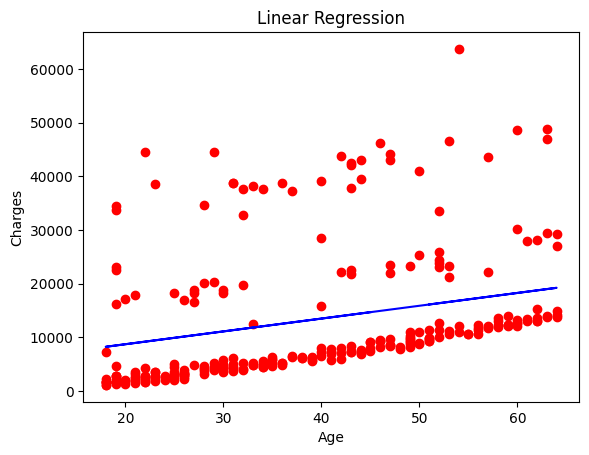

In [23]:
plt.scatter(x_age_test,y_test,color='red')
plt.plot(x_age_test,y_pred_age,color='blue')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [25]:
mean_absolute_error(y_test,y_pred_age)

9174.614180827823

In [27]:
mean_squared_error(y_test,y_pred_age)

136035979.1607568

In [28]:
r2_score(y_test,y_pred_age)

0.12375464937074065

In [34]:
#Multivariate

In [29]:
x_new = data[['age','bmi']]
y = data['charges']

In [30]:
x_new_train, x_new_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)

In [31]:
le = LinearRegression()
le.fit(x_new_train,y_train)

LinearRegression()

In [32]:
y_pred_new = le.predict(x_new_test)

In [33]:
r2_score(y_test,y_pred_new)

0.1525533201268875